<h1>Εξόρυξη Δεδομένων και Αλγόριθμοι Μάθησης</h1>
<h2>Εργαστηριακή Άσκηση Εαρινό Εξάμηνο 2023-2024</h2>
<h3>Στεργιόπουλος Γεώργιος<br>1083861<br>Τμήμα: ΗΜΤΥ</h3>

<h2><b>Ερώτημα 1</b></h2>
Σε αυτό το ερώτημα καλούμαστε να αναλύσουμε το σύνολο δεδομένων, να κάνουμε κατάλληλες γραφικές παραστάσεις και να παρατηρήσουμε τα στατιστικά.



<h3>Βάση Δεδομένων</h3>
Αρχικά λαμβάνουμε το σύνολο των δεδομένων μας σε 22 διαφορετικά αρχεία csv. Ενα αρχείο για κάθε χρήστη που συμμετείχε στις μετρήσεις. Για λόγους πρακτικούς, θα μετατρέψω αυτά τα csv αρχεία σε μια βάση δεδομένων (harth.db) η οποία στο schema της θα έχει 22 πίνακες με τα δεδομένα.

In [1]:
import sqlite3

#testers (name of csv files) now they will be used as table names
testers=['S006','S008','S009','S010','S012','S013','S014','S015','S016','S017',\
         'S018','S019','S020','S021','S022','S023','S024','S025','S026','S027',\
            'S028','S029']

conn=sqlite3.connect('harth.db')


Θα ορίσουμε μια συνάρτηση η οποία θα μας επιστρέφει το SQL Query 

In [5]:
def dataOfTester(tester):
    return 'SELECT * FROM '+tester

<h3>Περιγραφή και έλεγχος Δεδομένων</h3>
Ας δούμε τώρα για κάθε tester τα δεδόμενα που έχουμε στην βάση δεδομένων μας.

In [83]:
import pandas as pd
for i in testers:
    tester_df = pd.read_sql_query(dataOfTester(i), conn)  
    print("Info about tester: "+i)
    tester_df.info()

Info about tester: S006
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408709 entries, 0 to 408708
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  408709 non-null  object 
 1   back_x     408709 non-null  float64
 2   back_y     408709 non-null  float64
 3   back_z     408709 non-null  float64
 4   thigh_x    408709 non-null  float64
 5   thigh_y    408709 non-null  float64
 6   thigh_z    408709 non-null  float64
 7   label      408709 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 24.9+ MB
Info about tester: S008
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418989 entries, 0 to 418988
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  418989 non-null  object 
 1   back_x     418989 non-null  float64
 2   back_y     418989 non-null  float64
 3   back_z     418989 non-null  float64
 4   thigh_x 

Παρατηρώντας τις παραπάνω πληροφορίες, βλέπουμε οτι στην βάση δεν έχουμε missing ή null values. Eπιπλέον είναι σαφές οτί για την εργασία αυτή χρειαζόμαστε απο κάθε tester τις εξής πληροφορίες:
<ul>
<li>1. timestamp: date and time of recorded sample</li>
<li>2. back_x: acceleration of back sensor in x-direction (down) in the unit g</li>
<li>3. back_y: acceleration of back sensor in y-direction (left) in the unit g</li>
<li>4. back_z: acceleration of back sensor in z-direction (forward) in the unit g</li>
<li>5. thigh_x: acceleration of thigh sensor in x-direction (down) in the unit g</li>
<li>6. thigh_y: acceleration of thigh sensor in y-direction (right) in the unit g</li>
<li>7. thigh_z: acceleration of thigh sensor in z-direction (backward) in the unit g</li>
<li>8. label: annotated activity code</li>
</ul>

Συνεπώς στους Testers S015 και S021 οπου υπάρχει το field index, μπορούμε να το κάνουμε drop καθώς δεν μας παρέχει κάποια χρήσιμη πληροφορία.
Επιπλέον στον tester S023 θα κάνουμε drop το field1, για τους ίδιους λόγους.

Μετά απο αυτές τις ενέργεις θα έχουμε πετύχει ομοιομορφία στα πεδία των δεδομένων μας και δεν θα έχουμε αχρείαστες πληροφορίες.

<h3>Δημιουργία ενός Dataframe με τα δεδομένα όλων των tester</h3>

In [29]:
def createDataframe():
    df=pd.DataFrame()
    for i in testers:
        tester_df = pd.read_sql_query(dataOfTester(i), conn)
        if(i=='S015' or i=='S021'):
            tester_df=tester_df.drop(columns=['index'])
        if(i=='S023'):
            tester_df=tester_df.drop(columns=['field1'])
        df=pd.concat([df,tester_df],ignore_index=True)
    return df

df=pd.DataFrame()
df=createDataframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   timestamp  object 
 1   back_x     float64
 2   back_y     float64
 3   back_z     float64
 4   thigh_x    float64
 5   thigh_y    float64
 6   thigh_z    float64
 7   label      int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 394.4+ MB


<h3>Dataframe χωρίς Timestamp</h3>
Σε μερικές περιπτώσεις παρακάτω, η πληροφορία του timestamp δεν θα μας είναι χρήσιμη ως εκ τούτου ας δημιουργήσουμε ενα ελαφρύτερο Dataframe, κάνοντας drop το timestamp.

In [30]:
df_notime=pd.DataFrame()
df_notime=df.drop(columns=['timestamp'])
df_notime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6461328 entries, 0 to 6461327
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   back_x   float64
 1   back_y   float64
 2   back_z   float64
 3   thigh_x  float64
 4   thigh_y  float64
 5   thigh_z  float64
 6   label    int64  
dtypes: float64(6), int64(1)
memory usage: 345.1 MB


<h3>Πλήθος Data ανά activity</h3>
Ας υπολογίσουμε τώρα το σύνολο των δεδομένων για κάθε δραστηριότητα.

label
7      2902703
1      1197155
6       743480
8       428898
13      393963
2       291356
3       254839
4        76217
5        67253
14       55814
130      41785
140       7865
Name: count, dtype: int64


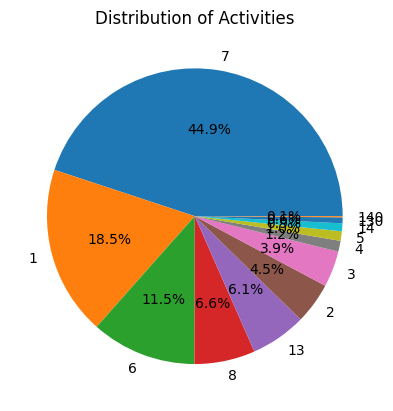

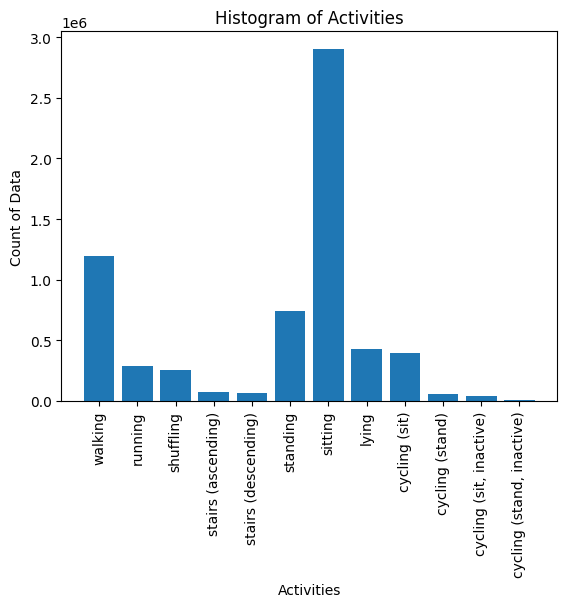

In [48]:
from  matplotlib import pyplot as plt

activities=['1','2','3','4','5','6','7','8','13','14','130','140']

activities_names=['walking','running','shuffling','stairs (ascending)','stairs (descending)',\
                  'standing','sitting','lying','cycling (sit)','cycling (stand)',\
                    'cycling (sit, inactive)','cycling (stand, inactive)']

### ORDERED and Pie Chart###
activity_counts = df_notime['label'].value_counts()
print(activity_counts)
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Activities')
plt.show()

### HISTGRAM ###
count_activities=[]
for i in range(len(activities)):
    count_activities.append(len(df_notime[df_notime['label'] == int(activities[i])]))
plt.bar(activities_names, count_activities)
plt.xlabel('Activities')
plt.ylabel('Count of Data')
plt.title('Histogram of Activities')
plt.xticks(rotation=90)
plt.show()





<h3>Dataframes ανά δραστηριότητα</h3>
Ας δημιουργήσουμε τώρα μία λίστα η οποία θα περιέχει Dataframes για κάθε δραστηριότητα ξεχωριστά.

In [97]:
def dfperActivity():
    df_list=[]
    for i in range(len(activities)):
        df_list.append(df_notime[df_notime['label'] == int(activities[i])])
    return df_list

df_per_activity=dfperActivity()


for i in range(len(activities)):
    print("Info about activity: "+activities_names[i],'\n',df_per_activity[i].describe().loc['mean':'std'])

Info about activity: walking 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.992566 -0.038755 -0.137808 -1.056683 -0.023477 -0.074345    1.0
std   0.311378  0.190476  0.287737  0.639900  0.536738  0.721997    0.0
Info about activity: running 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.965280 -0.076626 -0.259829 -1.246811 -0.164790 -0.140530    2.0
std   1.113858  0.407701  0.451772  1.438550  0.898353  1.381836    0.0
Info about activity: shuffling 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.982356 -0.022316 -0.031349 -0.974374  0.020759 -0.068220    3.0
std   0.106649  0.158300  0.208112  0.192159  0.226300  0.294548    0.0
Info about activity: stairs (ascending) 
         back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label
mean -0.961095 -0.033405 -0.065052 -1.016784  0.013345 -0.006504    4.0
std   0.268016  0.170207  0.336750  0.496791  0.308519  0.455921    0.0

<h3>Ιστόγραμμα ανα δραστηριότητα/ανα αισθητήρα</h3>
Θα δημιουργήσουμε τώρα ένα ιστόγραμμα για κάθε αισθητήτα ανα δραστηρίοτητα.

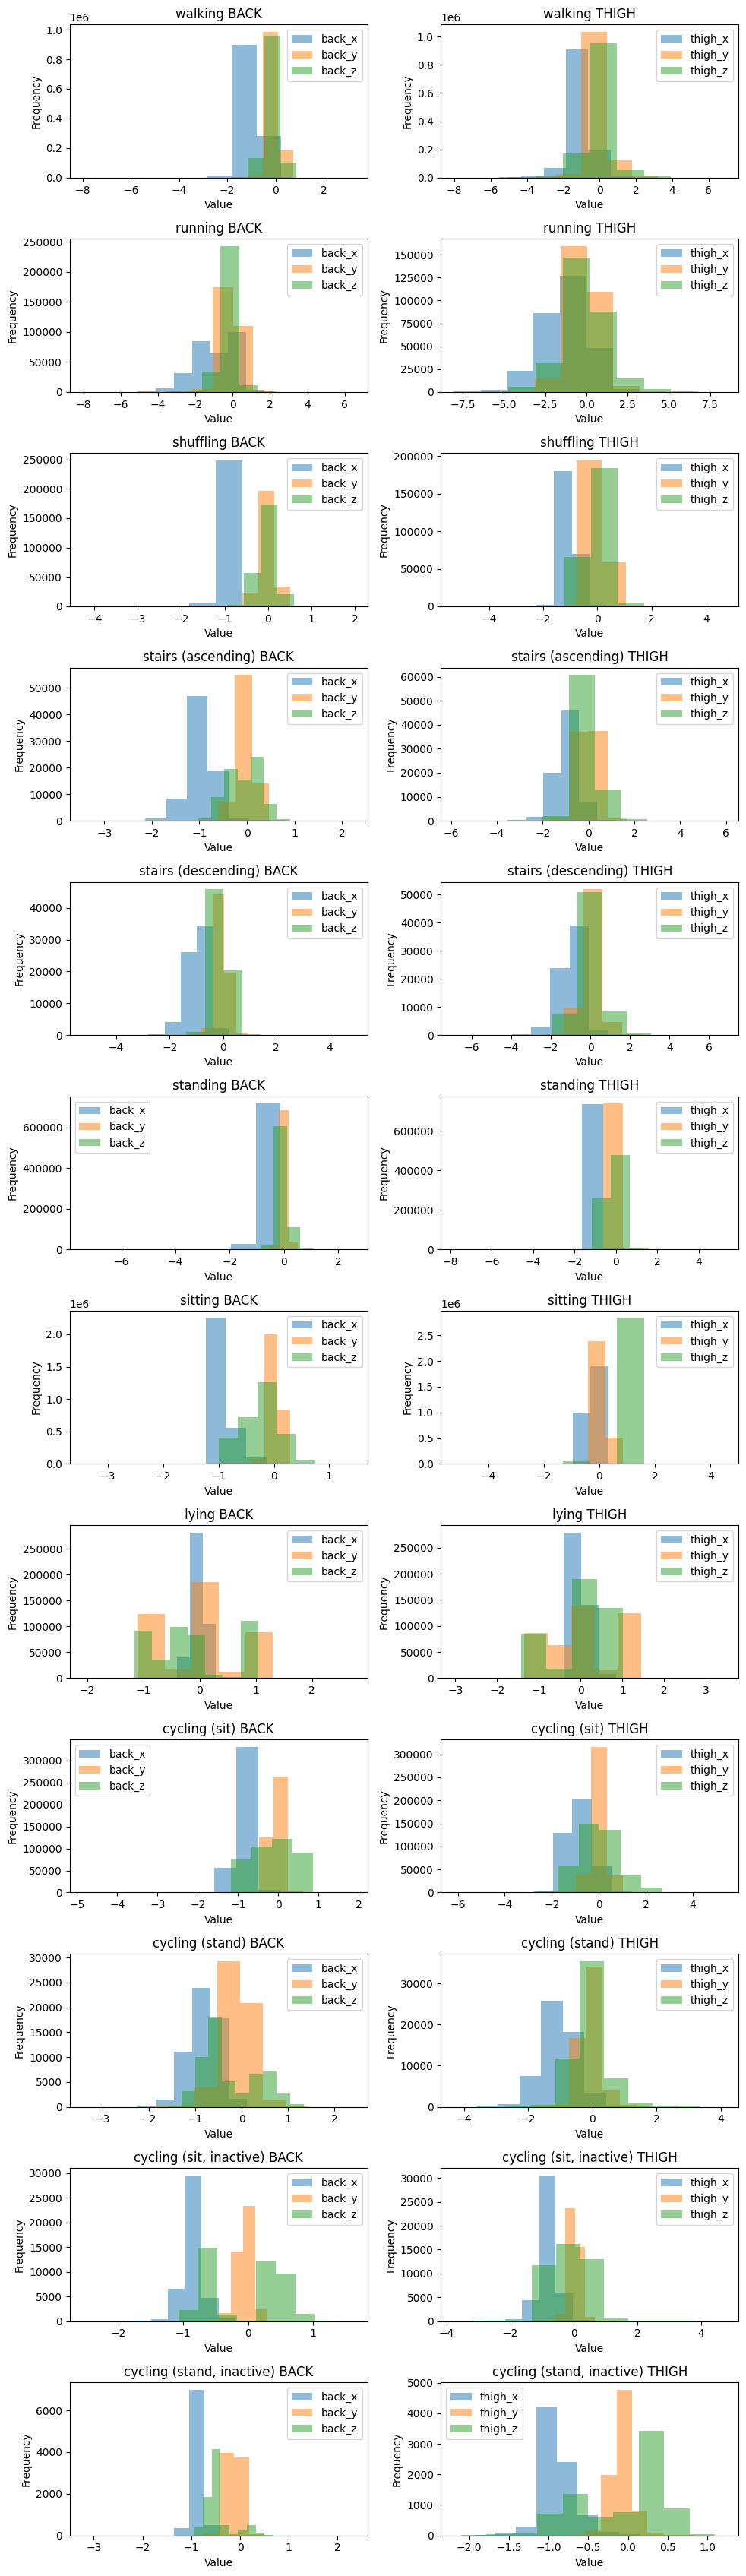

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 34))

for i in range(len(activities)):
    plt.subplot(12, 2, i*2+1)
    plt.hist(df_per_activity[i]['back_x'], alpha=0.5, label='back_x')
    plt.hist(df_per_activity[i]['back_y'], alpha=0.5, label='back_y')
    plt.hist(df_per_activity[i]['back_z'], alpha=0.5, label='back_z')
    plt.title(activities_names[i]+' BACK')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(12, 2, i*2+2)
    plt.hist(df_per_activity[i]['thigh_x'], alpha=0.5, label='thigh_x')
    plt.hist(df_per_activity[i]['thigh_y'], alpha=0.5, label='thigh_y')
    plt.hist(df_per_activity[i]['thigh_z'], alpha=0.5, label='thigh_z')
    plt.title(activities_names[i]+' THIGH')
    plt.legend()
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h3>Ιστόγραμμα ανα μέτρηση ανα δραστηριότητα (έλεγχος κατανομών)</h3>
Θα παρουσιάσουμε 12 διαγράμματα 1 για κάθε δραστηριότητα έτσι ώστε να δούμε τι κατανομές ακολουθούν οι μετρήσεις. Θα δημιουργήσουμε ιστογράμματα τα οποία έχουν τις γραμμές mean και std, έτσι ώστε να γίνεται εύκολα αντιλληπτό.

walking


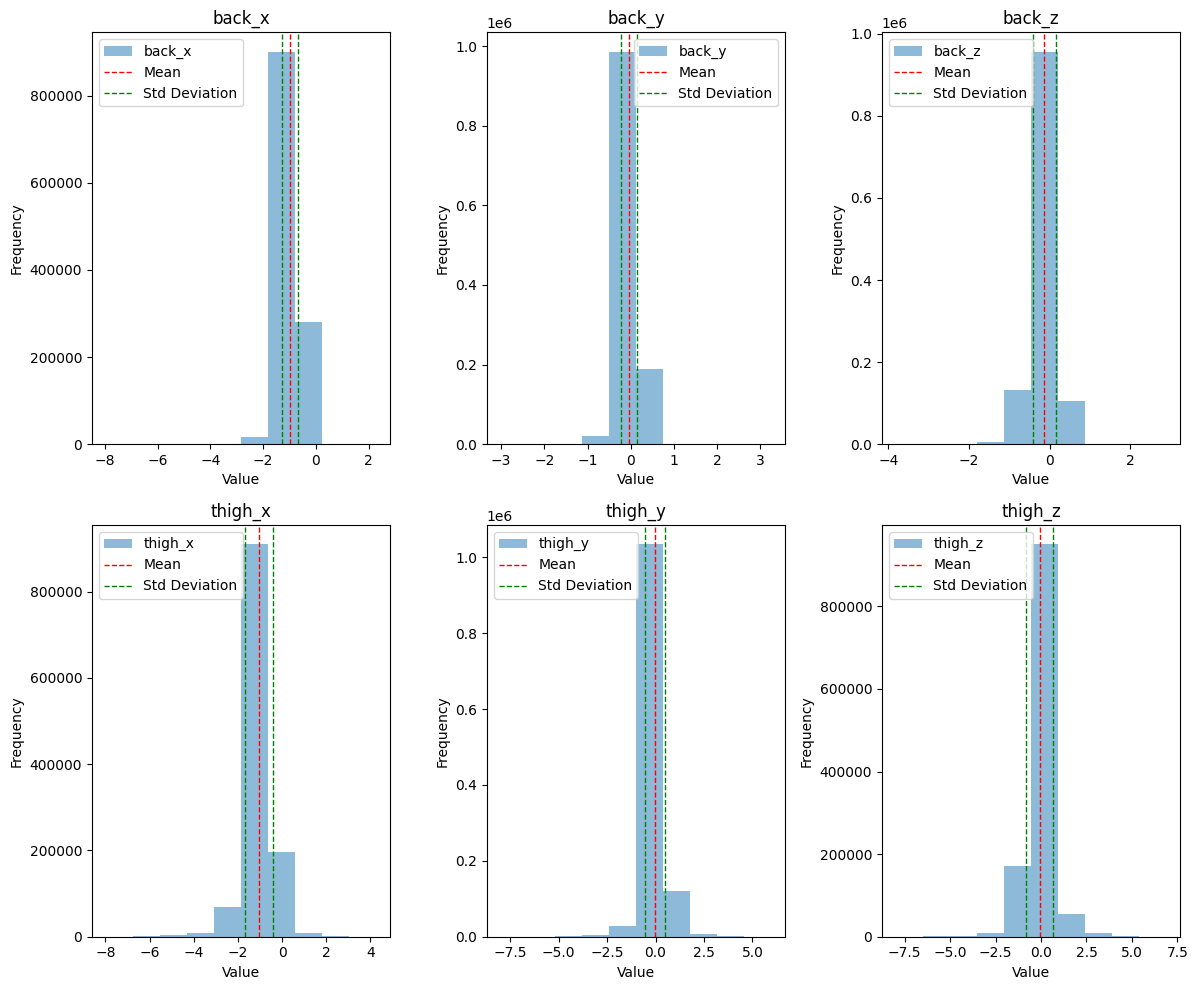

running


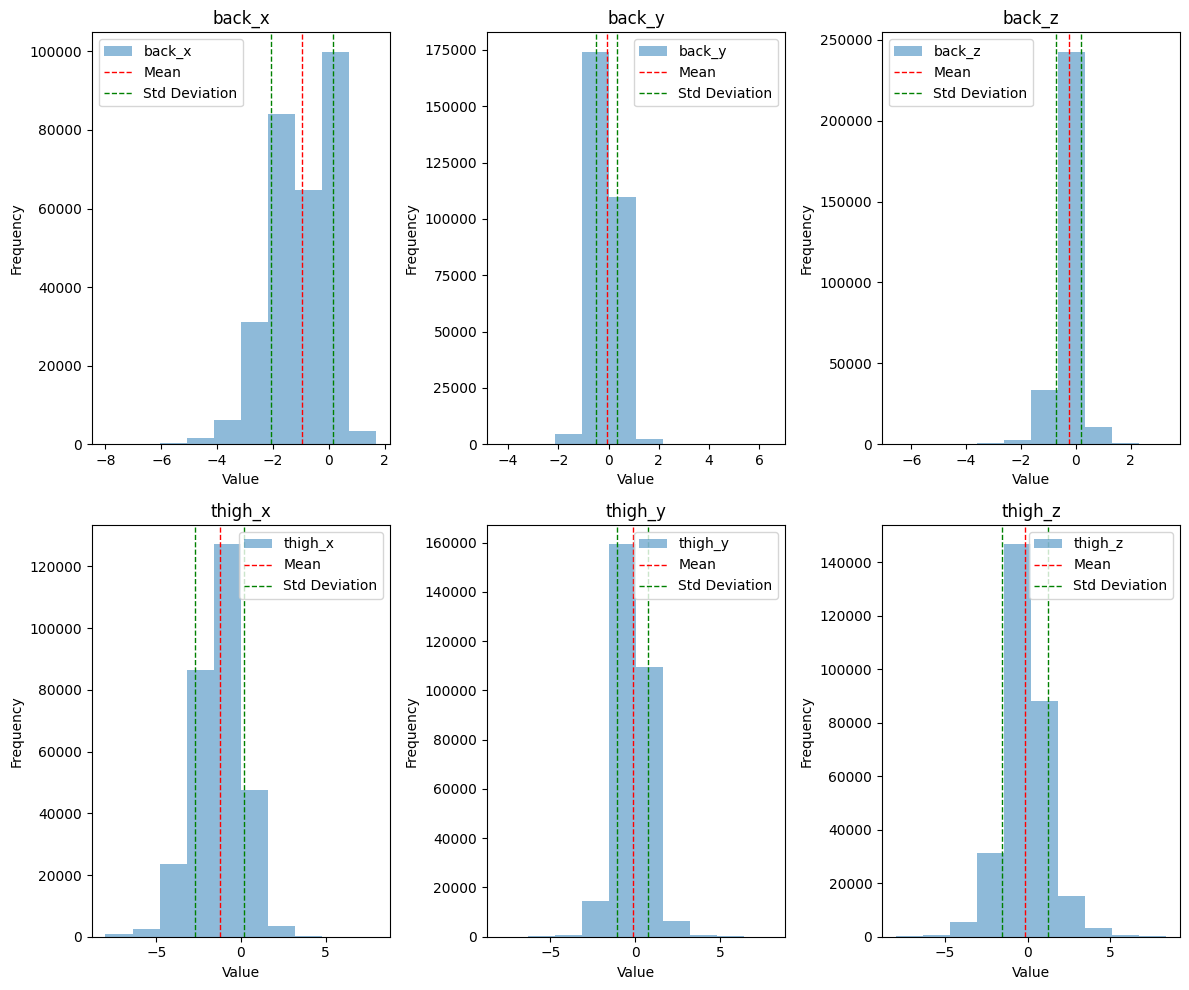

shuffling


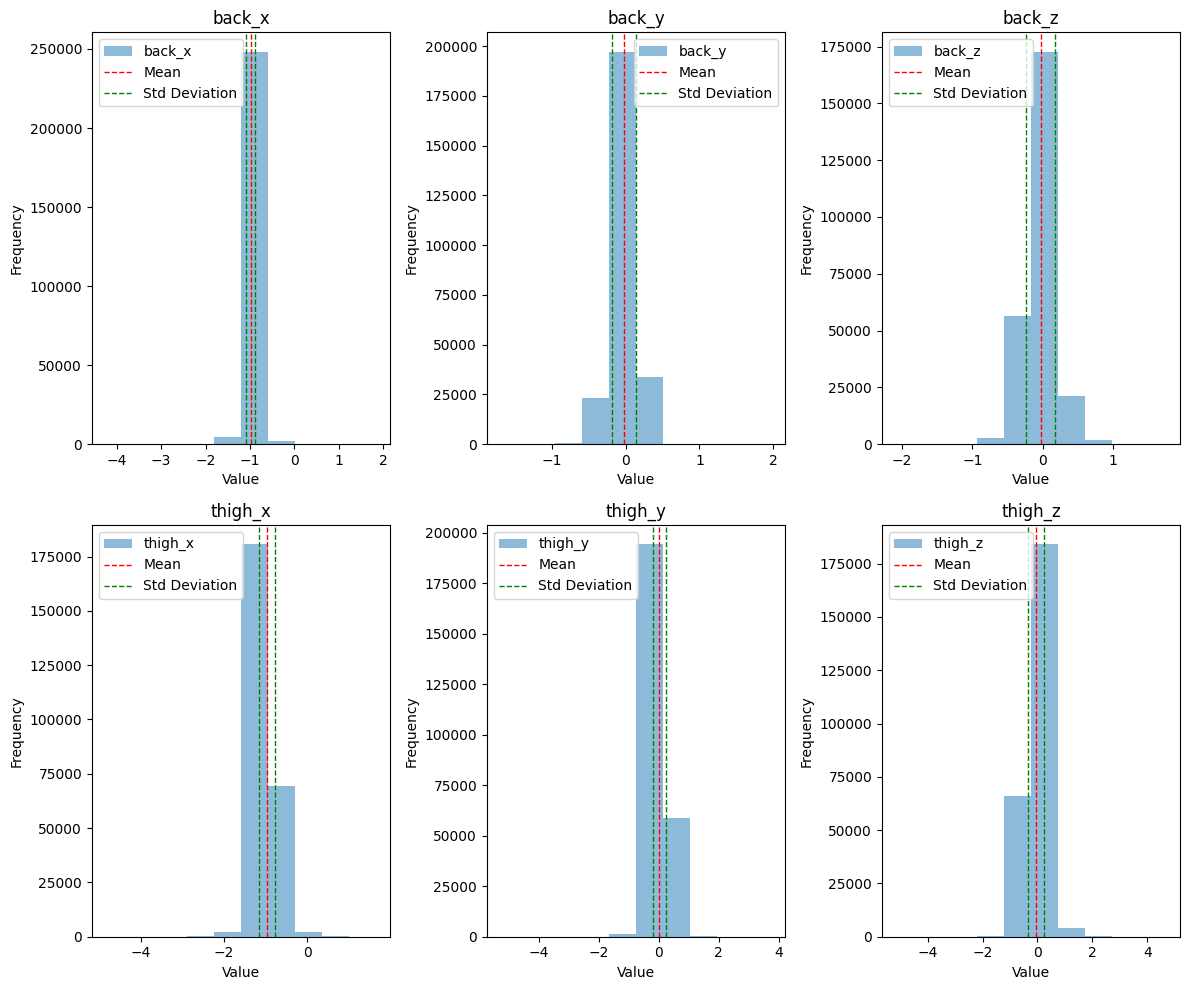

stairs (ascending)


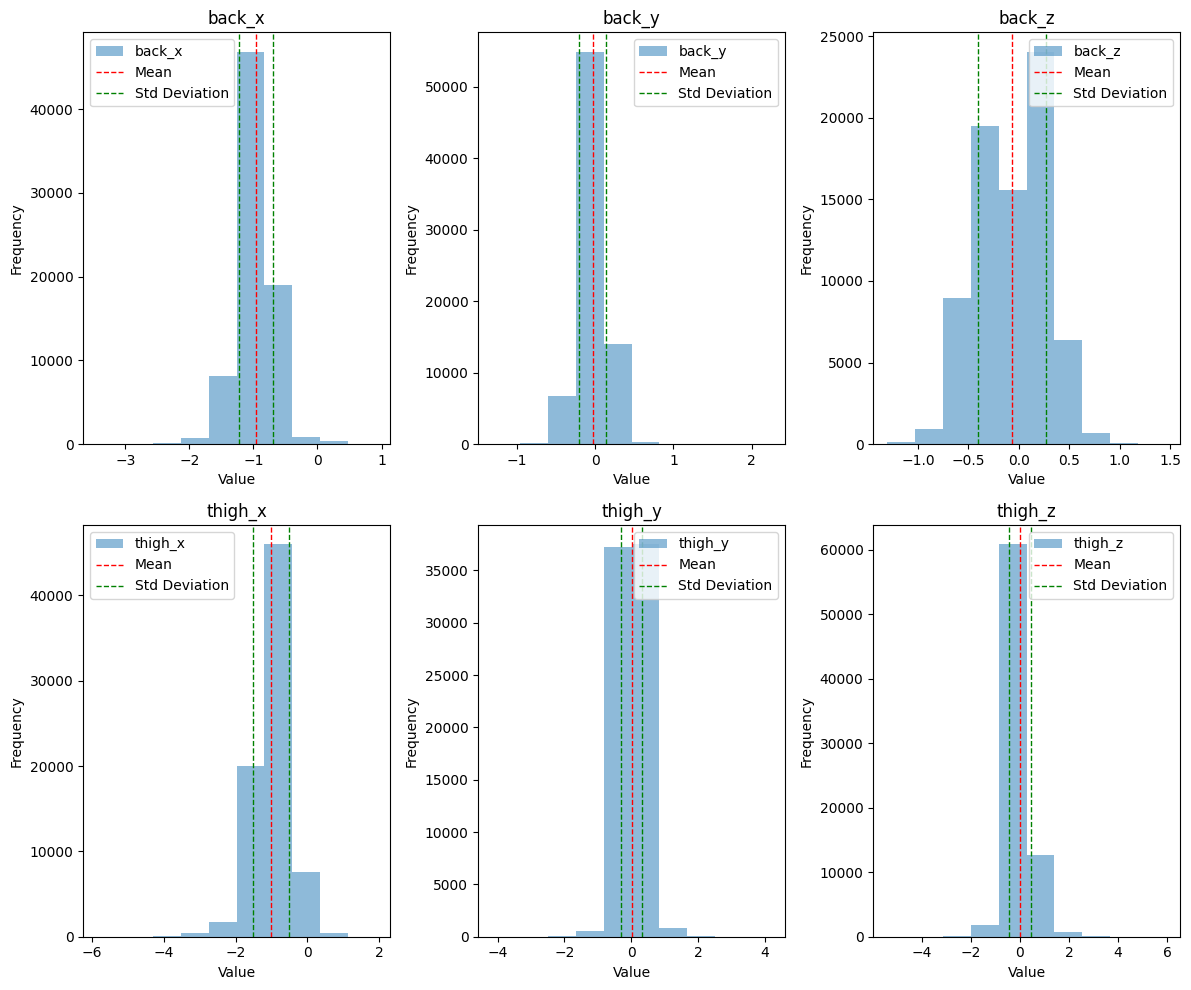

stairs (descending)


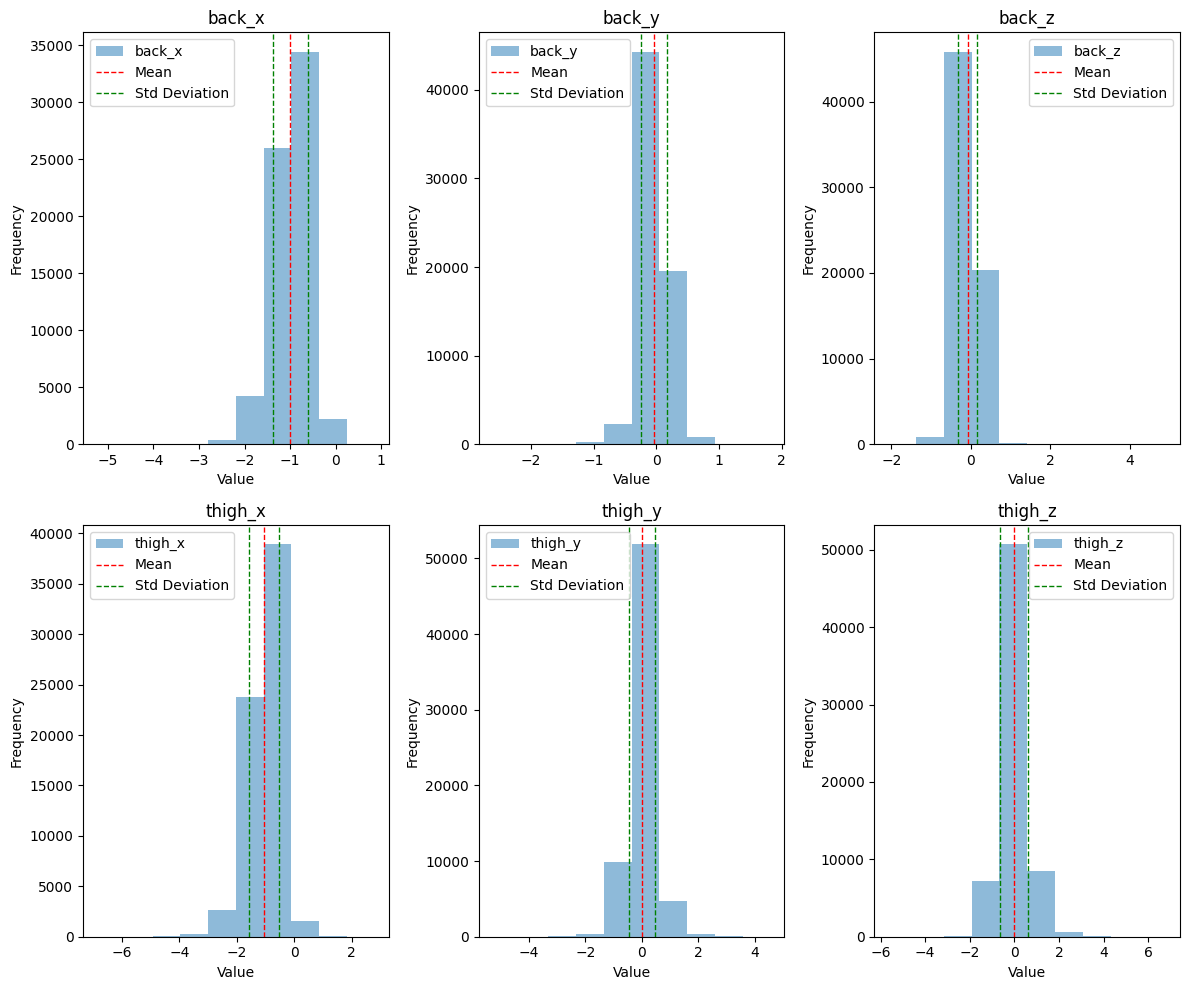

standing


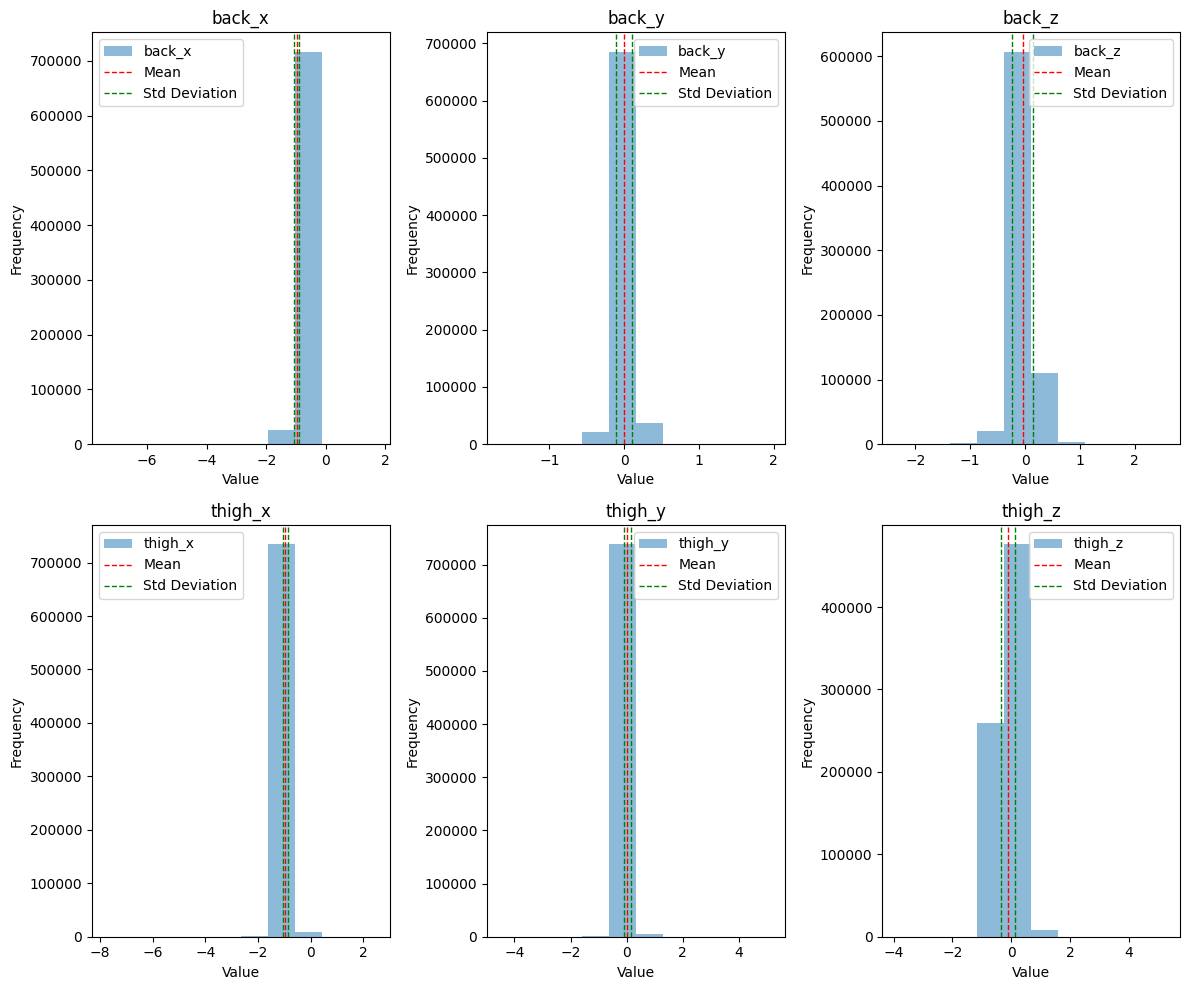

sitting


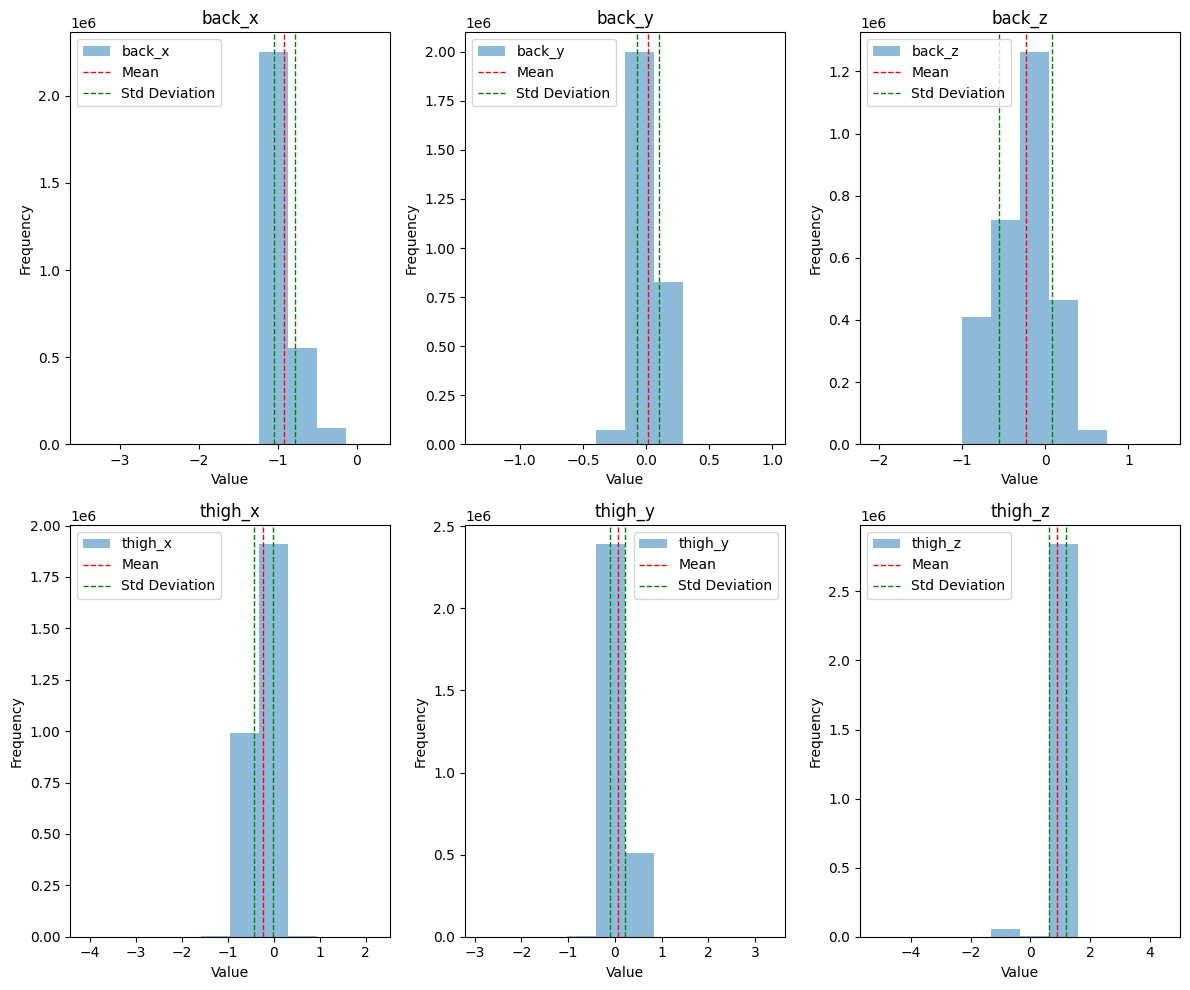

lying


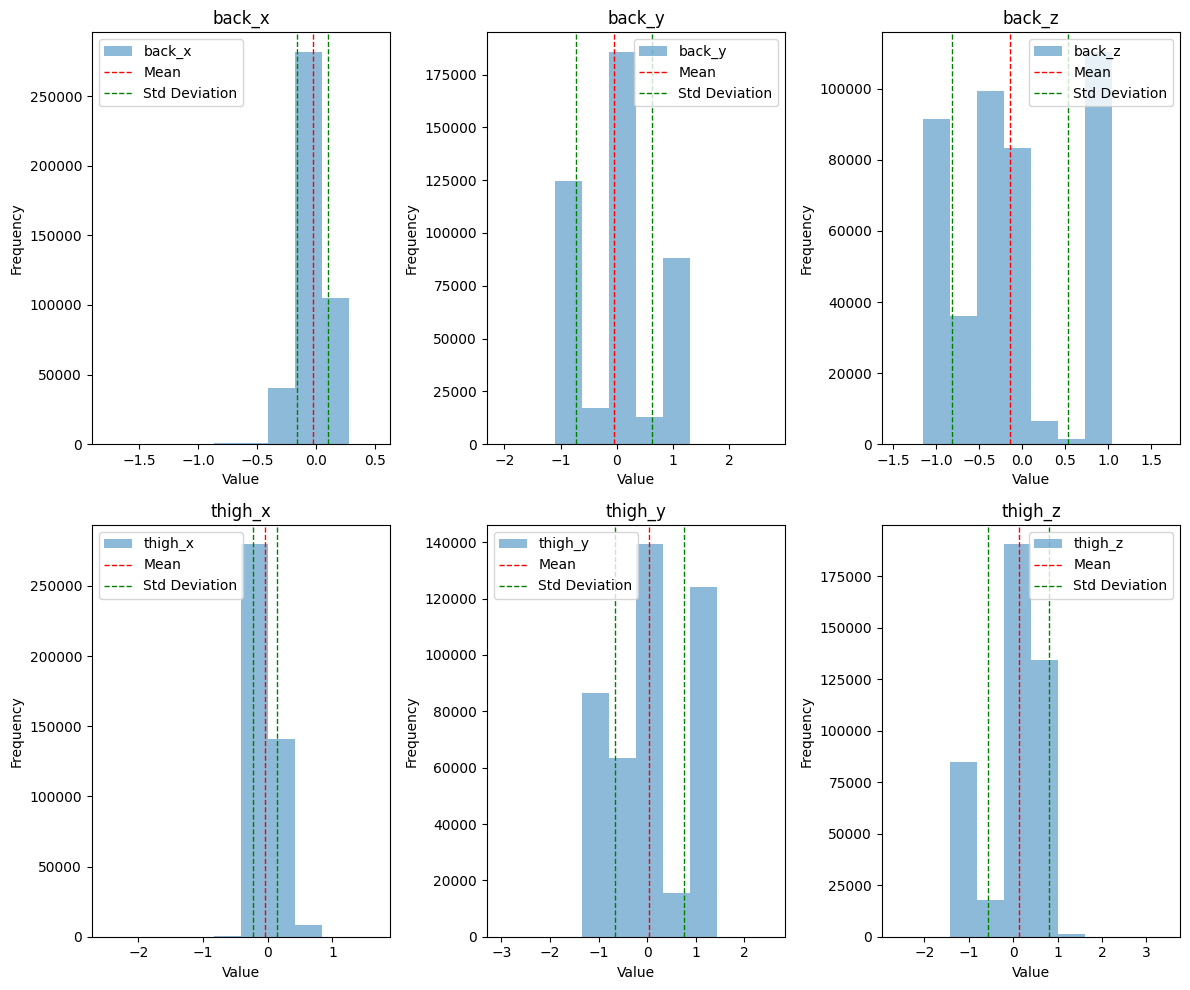

cycling (sit)


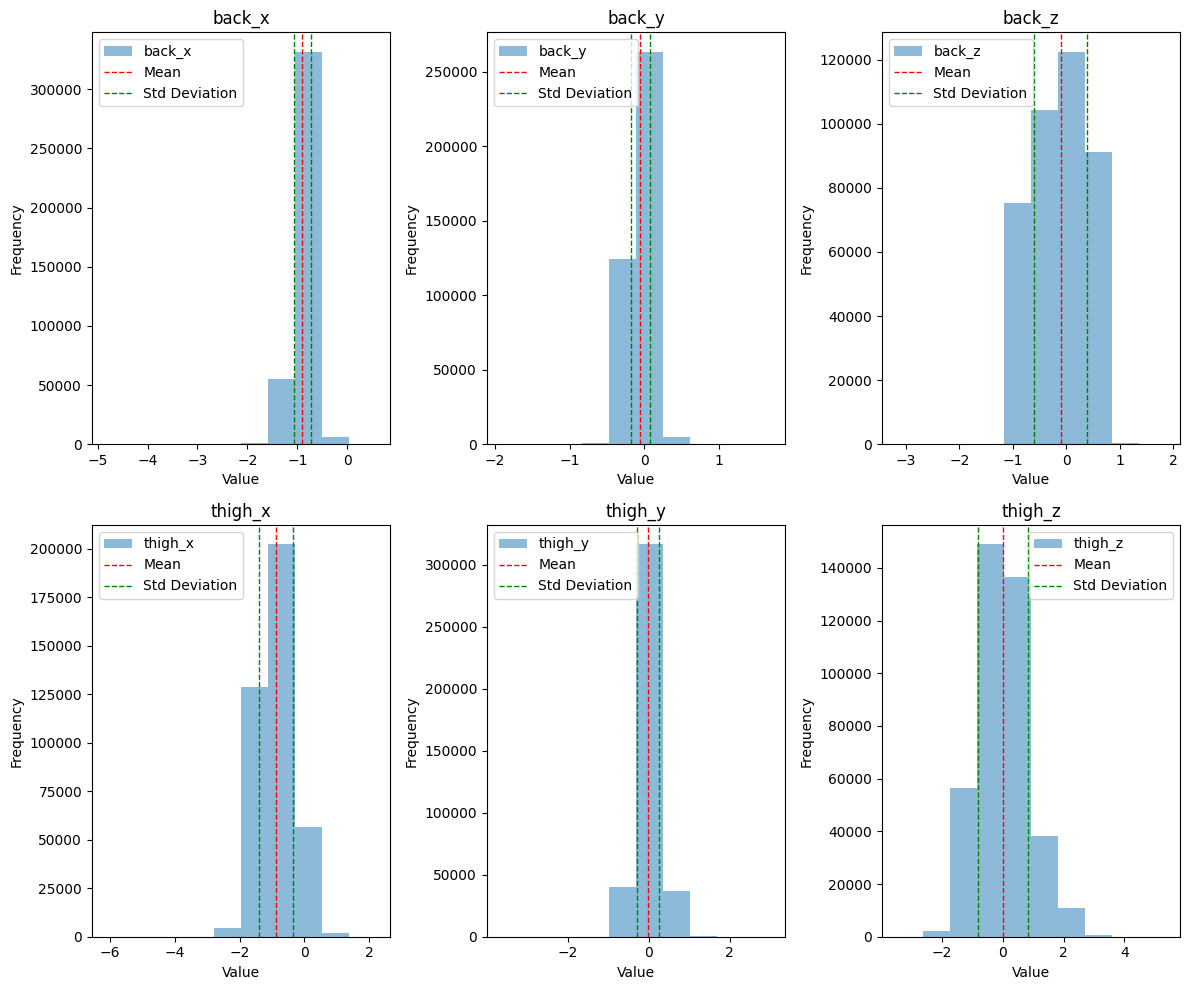

cycling (stand)


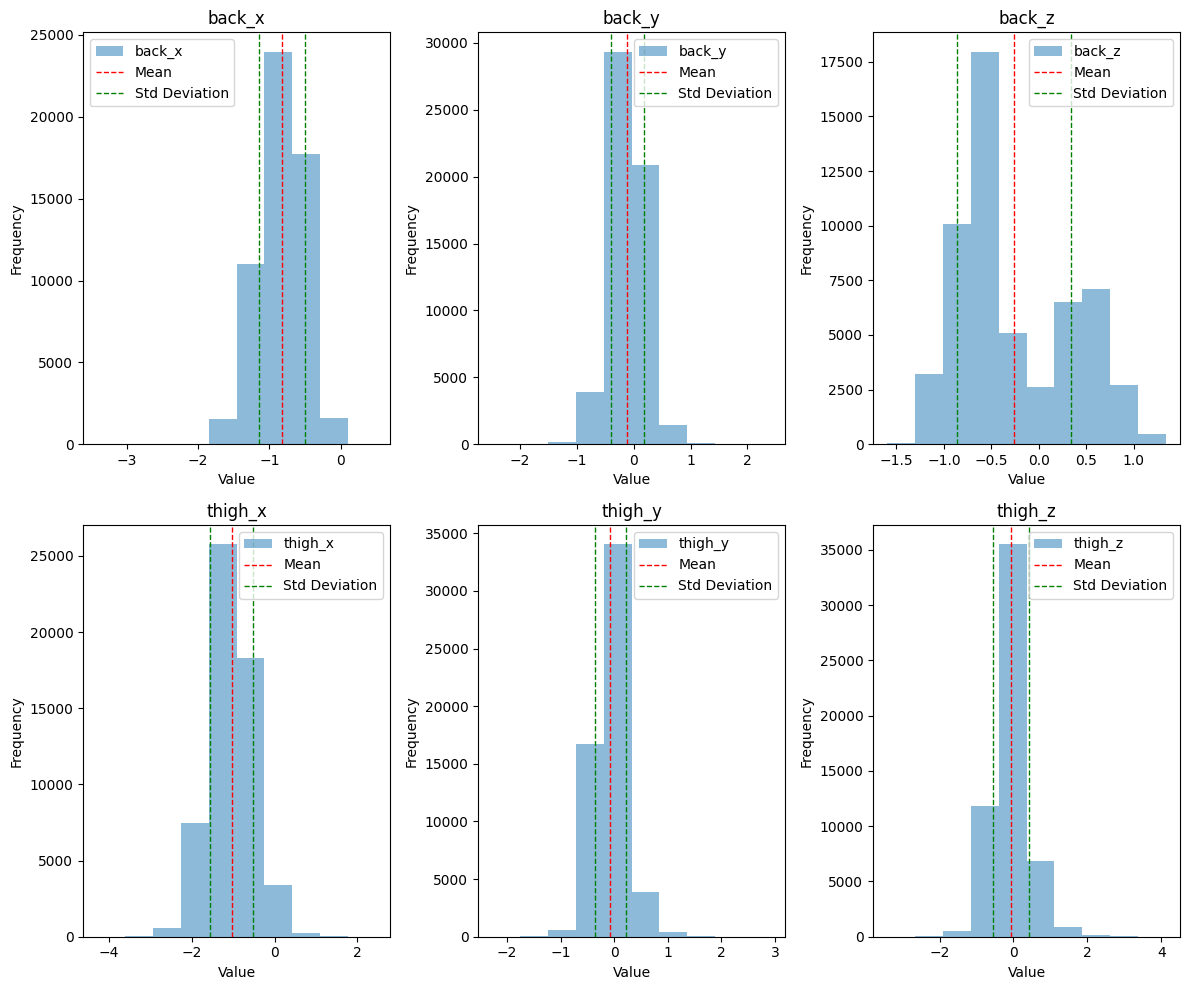

cycling (sit, inactive)


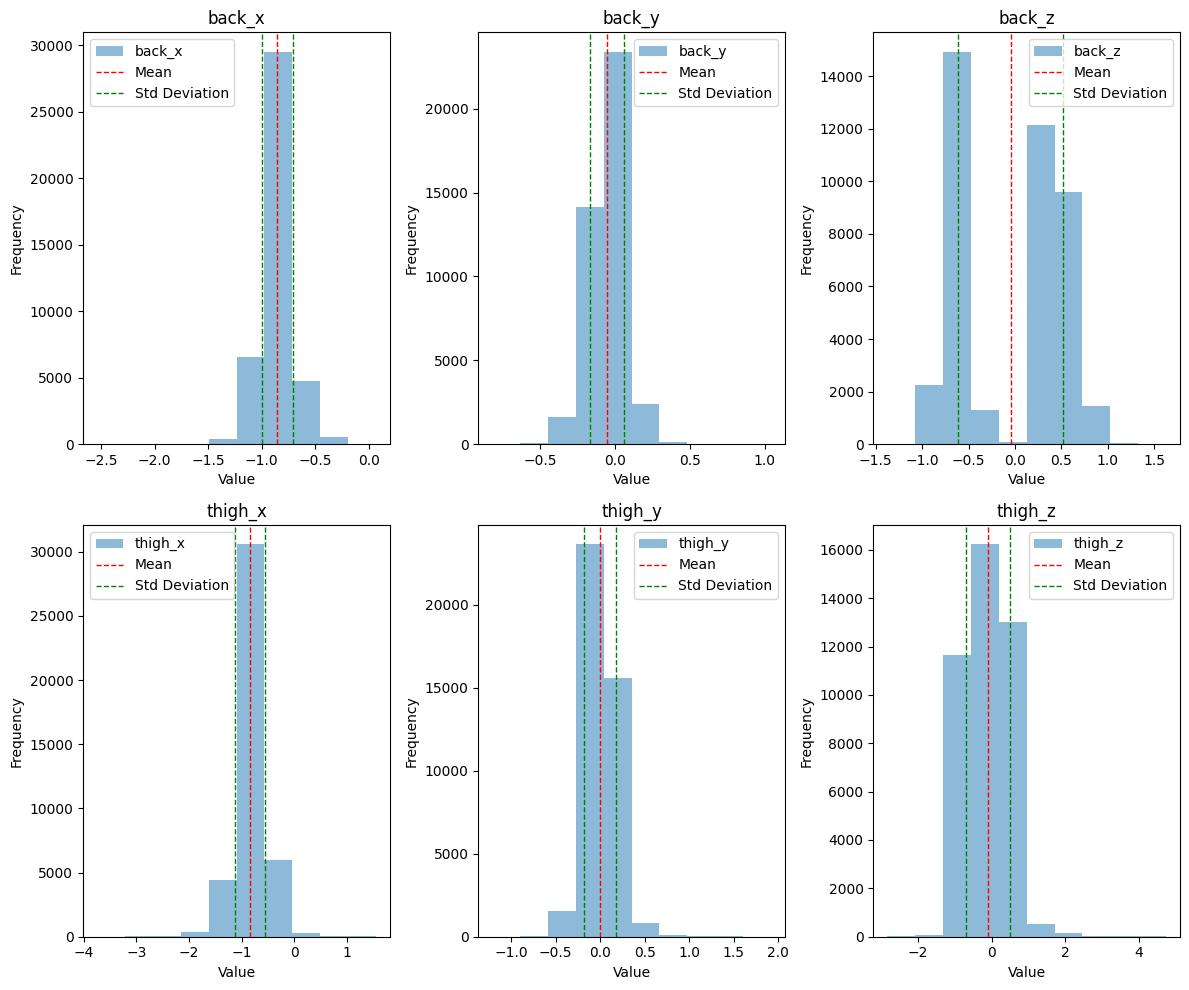

cycling (stand, inactive)


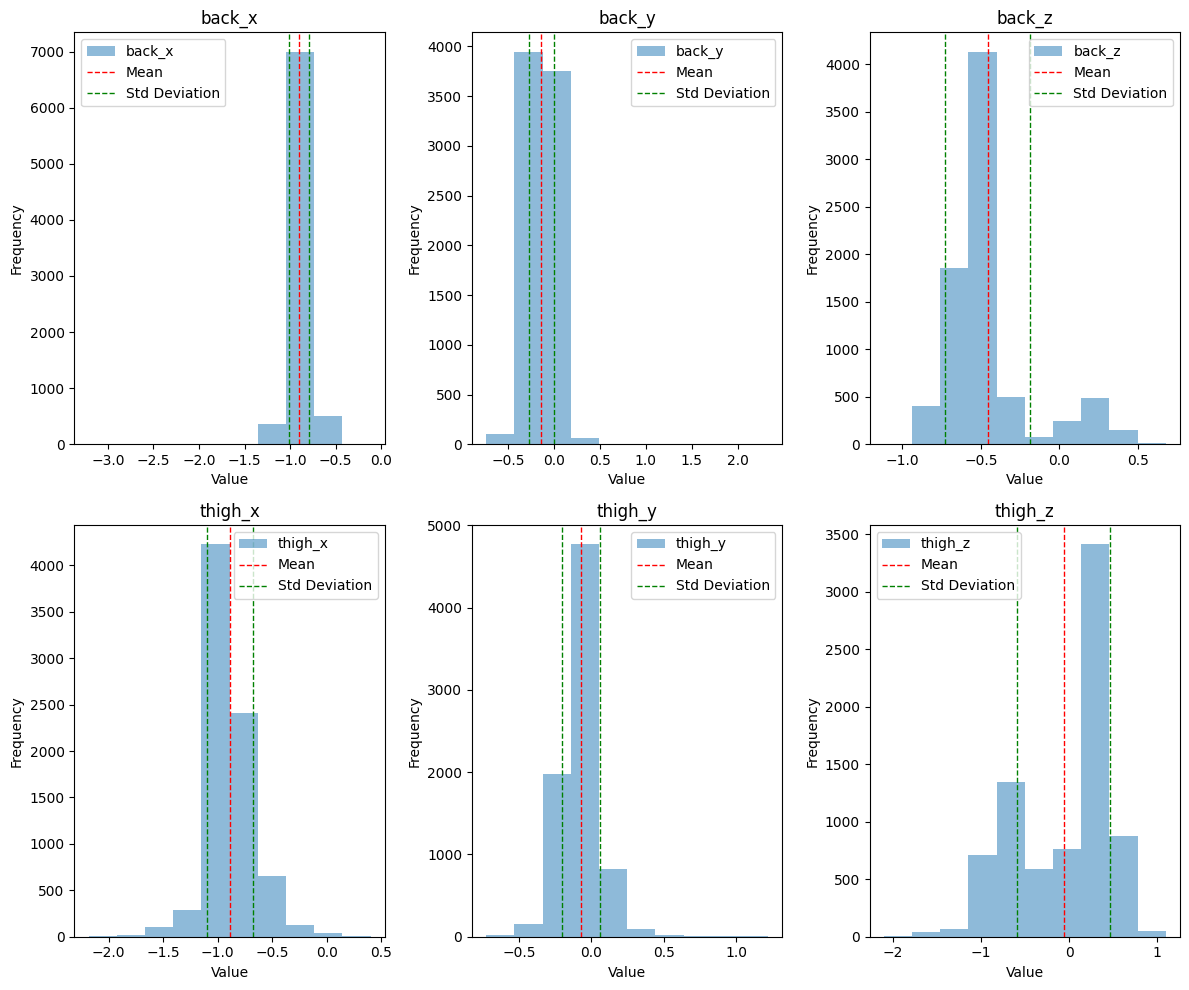

In [84]:
def createperactiv_plot(i):
    print(activities_names[i])
    plt.figure(figsize=(12, 10))  # Create a figure with a larger size
    plt.subplot(2, 3, 1)
    plt.hist(df_per_activity[i]['back_x'], alpha=0.5, label='back_x')
    plt.axvline(df_per_activity[i]['back_x'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['back_x'].mean() - df_per_activity[i]['back_x'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['back_x'].mean() + df_per_activity[i]['back_x'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('back_x')
    plt.legend()

    plt.subplot(2, 3, 2)
    plt.hist(df_per_activity[i]['back_y'], alpha=0.5, label='back_y')
    plt.axvline(df_per_activity[i]['back_y'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['back_y'].mean() - df_per_activity[i]['back_y'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['back_y'].mean() + df_per_activity[i]['back_y'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('back_y')
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.hist(df_per_activity[i]['back_z'], alpha=0.5, label='back_z')
    plt.axvline(df_per_activity[i]['back_z'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['back_z'].mean() - df_per_activity[i]['back_z'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['back_z'].mean() + df_per_activity[i]['back_z'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('back_z')
    plt.legend()

    plt.subplot(2, 3, 4)
    plt.hist(df_per_activity[i]['thigh_x'], alpha=0.5, label='thigh_x')
    plt.axvline(df_per_activity[i]['thigh_x'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['thigh_x'].mean() - df_per_activity[i]['thigh_x'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['thigh_x'].mean() + df_per_activity[i]['thigh_x'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('thigh_x')
    plt.legend()

    plt.subplot(2, 3, 5)
    plt.hist(df_per_activity[i]['thigh_y'], alpha=0.5, label='thigh_y')
    plt.axvline(df_per_activity[i]['thigh_y'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['thigh_y'].mean() - df_per_activity[i]['thigh_y'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['thigh_y'].mean() + df_per_activity[i]['thigh_y'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('thigh_y')
    plt.legend()

    plt.subplot(2, 3, 6)
    plt.hist(df_per_activity[i]['thigh_z'], alpha=0.5, label='thigh_z')
    plt.axvline(df_per_activity[i]['thigh_z'].mean(), color='r', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df_per_activity[i]['thigh_z'].mean() - df_per_activity[i]['thigh_z'].std(), color='g', linestyle='dashed', linewidth=1, label='Std Deviation')
    plt.axvline(df_per_activity[i]['thigh_z'].mean() + df_per_activity[i]['thigh_z'].std(), color='g', linestyle='dashed', linewidth=1)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('thigh_z')
    plt.legend()


    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

for i in range(len(activities)):
    createperactiv_plot(i)

<h3>Πίνακας Συσχετίσεων</h3>
Στόχος εδώ είναι να δούμε την συσχέτιση των δεδομένων, τόσο μεταξύ τους, όσο και κατα ποσο οδηγούν σε συμπεράσματα για την δραστηριότητα του ατόμου.

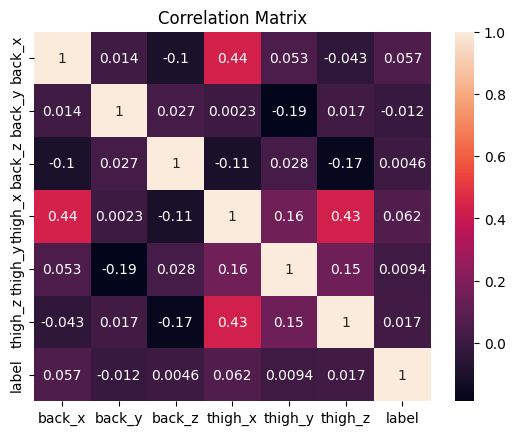

In [87]:
import seaborn as sns

sns.heatmap(df_notime.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

<h3>Συσχετίσεις ανα δραστηριότητα</h3>
Αυτό το γράφημα έχει σκοπό να δείξει τις συσχετίσεις των μετρήσεων των αισθητήρων μεταξύ τους, ανα δραστηριότητα.

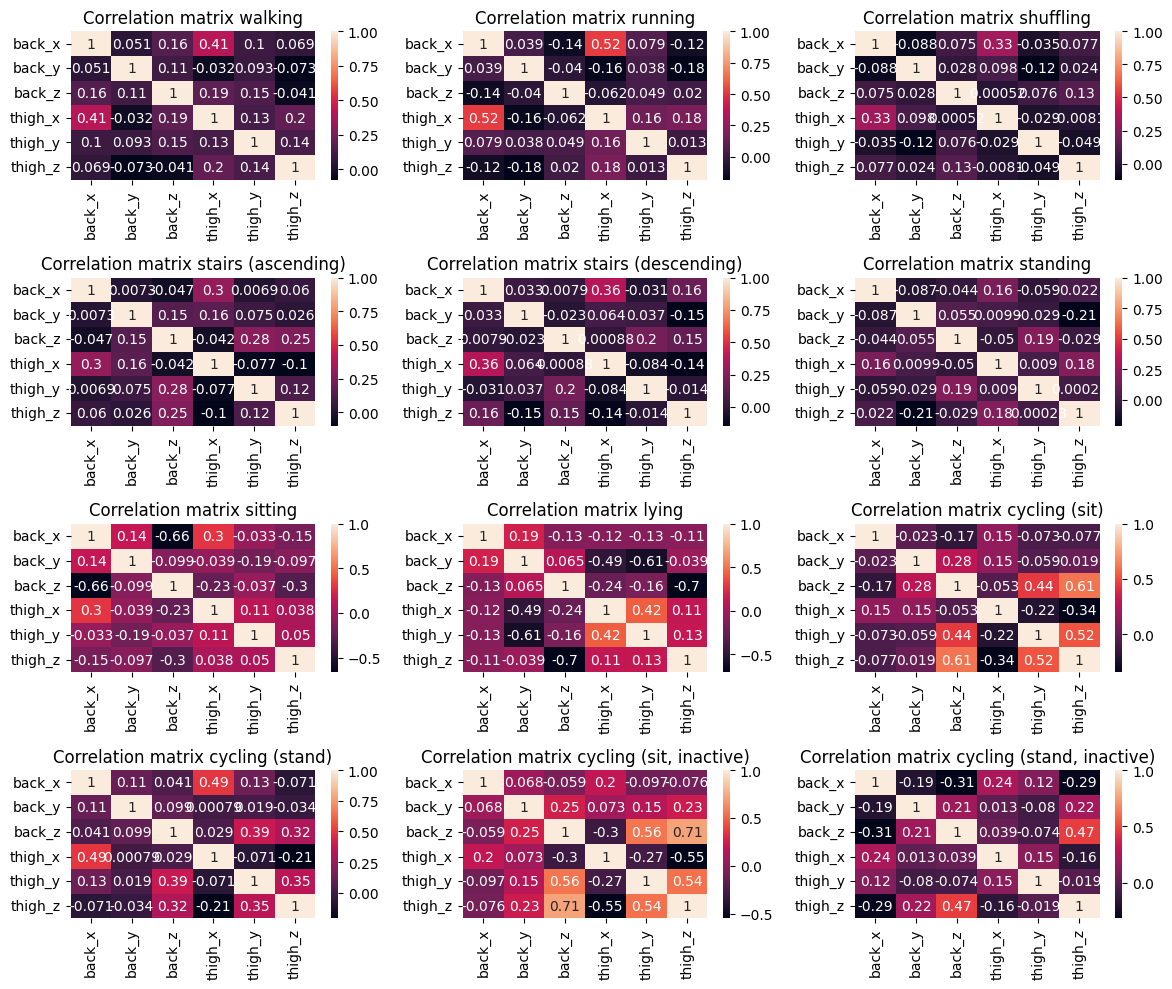

In [102]:
cnt=0
plt.figure(figsize=(12, 10))
df_copy=dfperActivity()
for i in range(len(df_copy)):
    df_copy[i] = df_copy[i].copy() 
    df_copy[i].drop(['label'],axis=1,inplace=True)
    plt.subplot(4, 3, cnt+1)
    plt.title('Correlation matrix '+activities_names[cnt])
    sns.heatmap(df_copy[i].corr(),annot=True)
    cnt+=1
    
plt.tight_layout()
plt.show()

<h3>Εντοπισμός Outliers</h3>


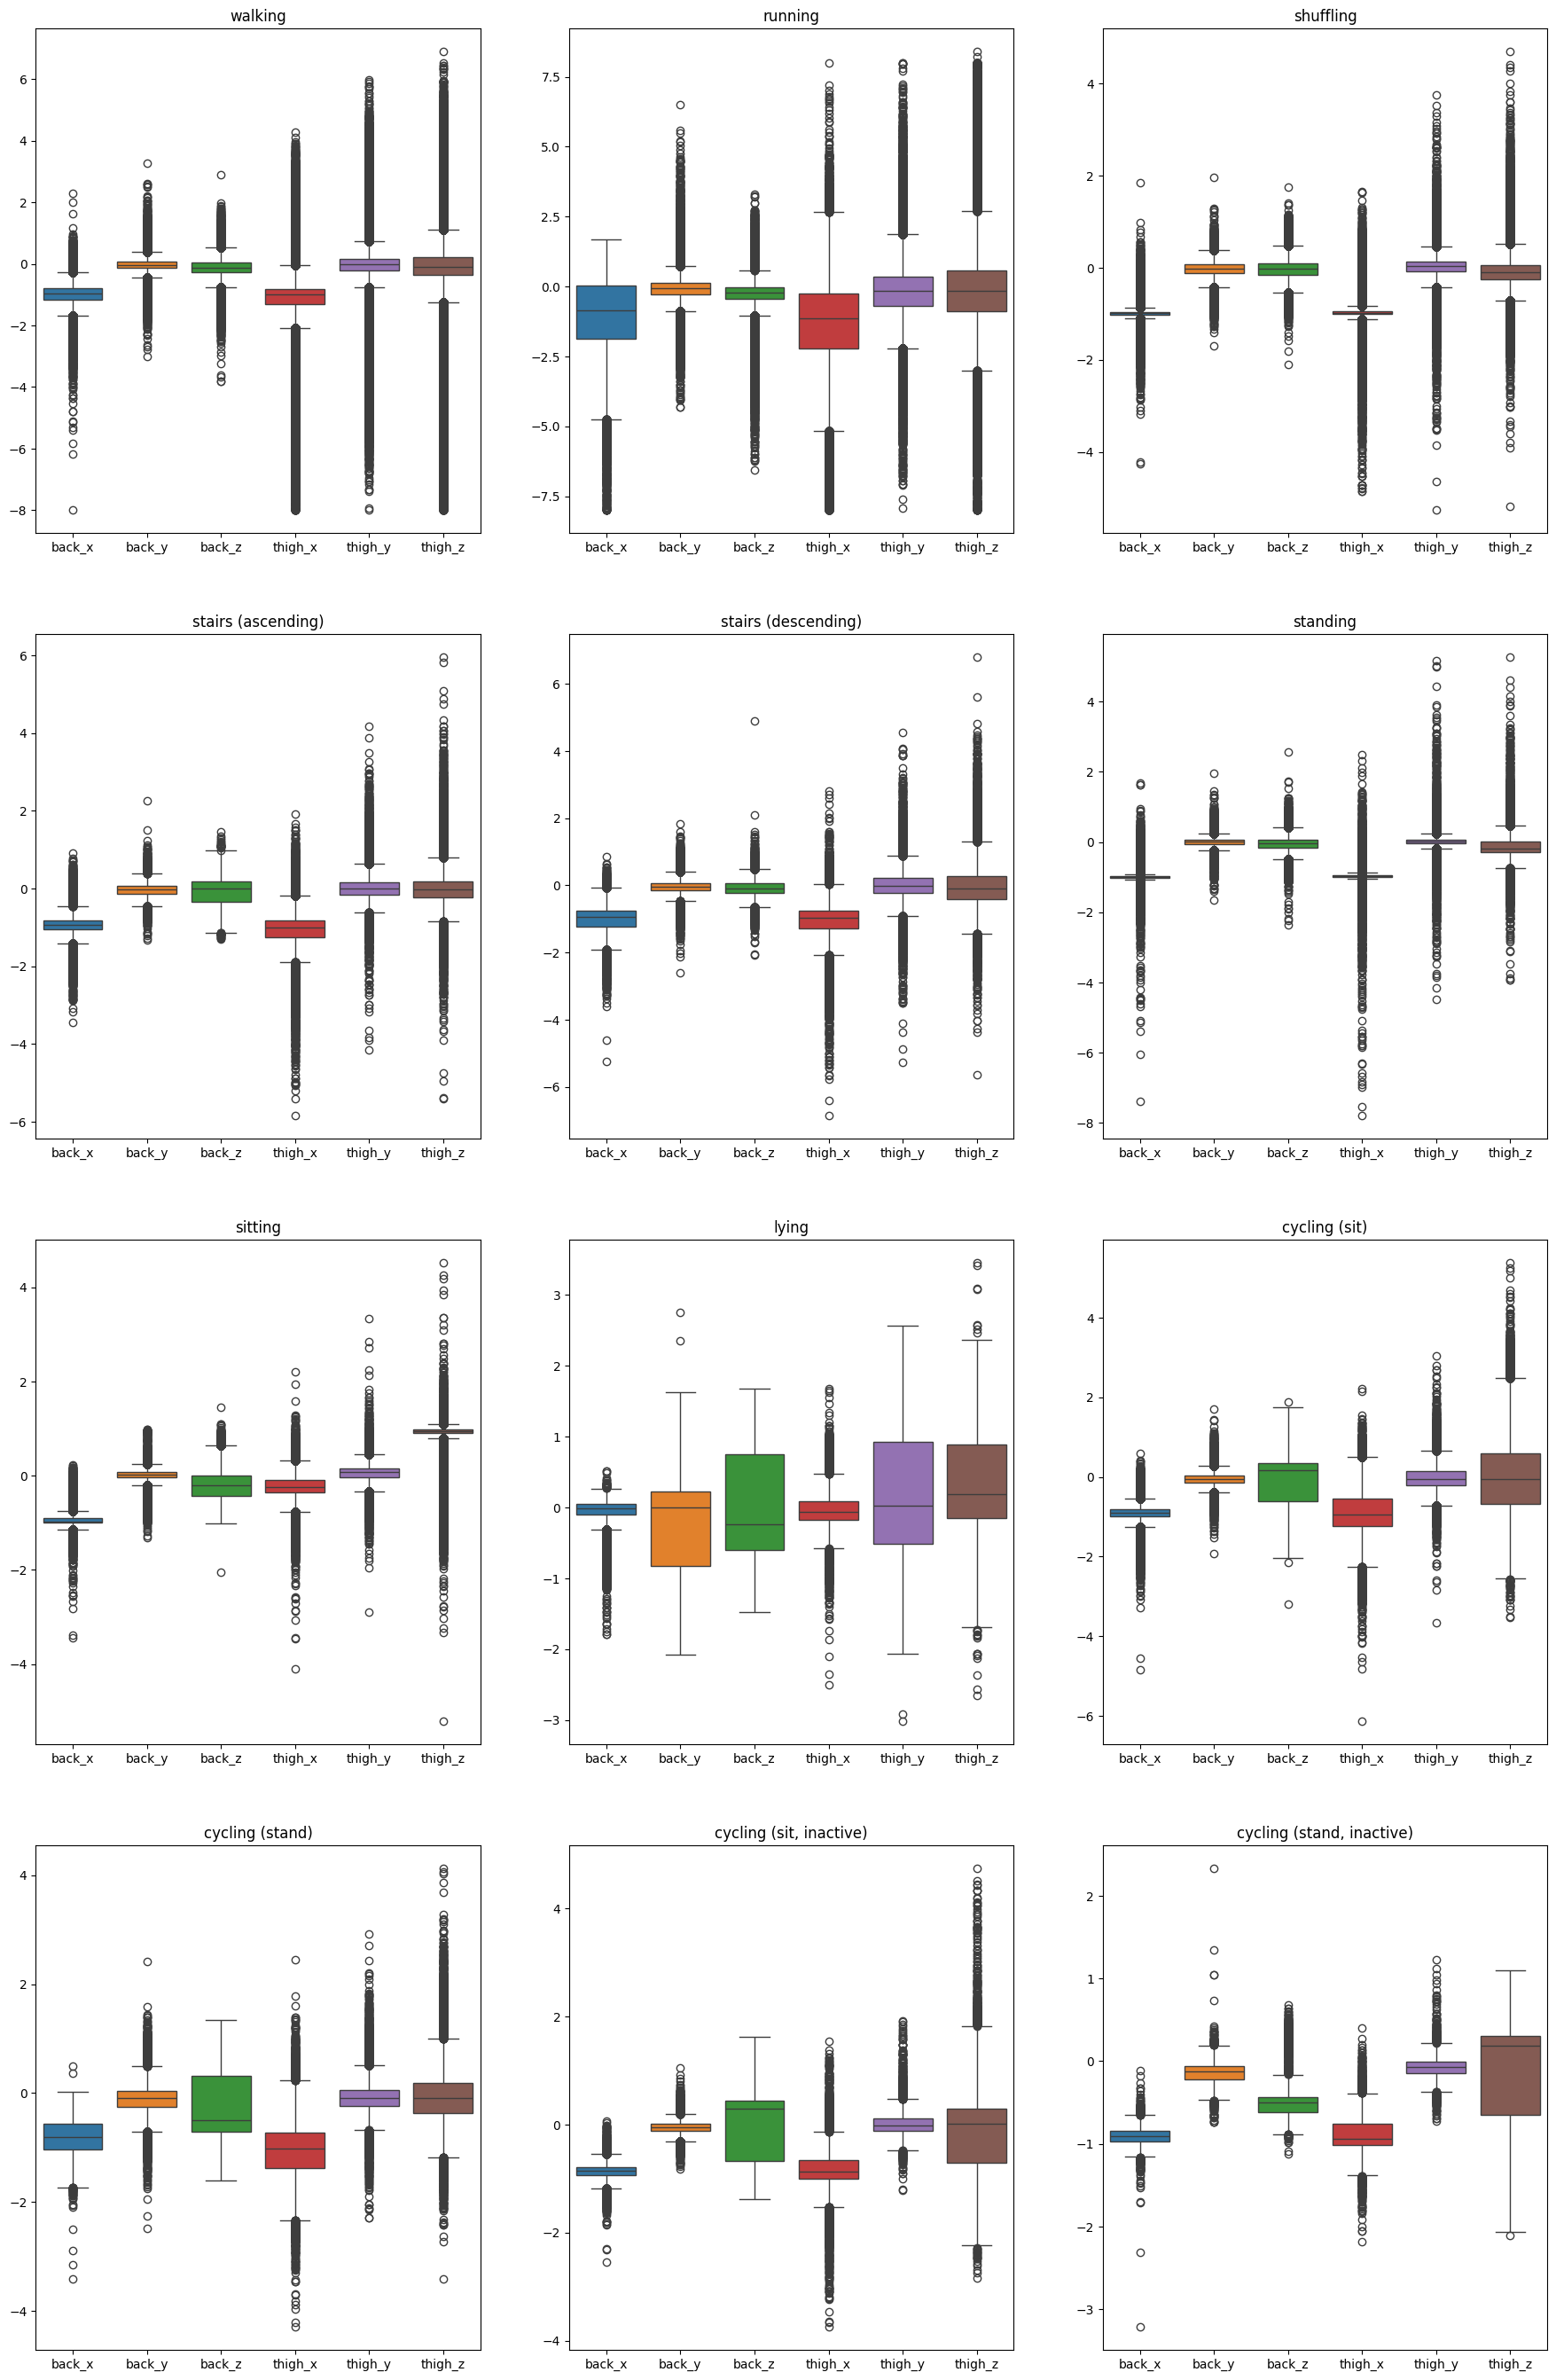

In [108]:
import seaborn as sns
plt.figure(figsize=(22, 34))
for i in range(len(activities)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(data=df_copy[i])
    plt.title(activities_names[i])
    
plt.show()

